In [1]:
#6.1.4

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#6.1.5
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# 6.2.6 - Getting the City Weather Data

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key



In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Query URL
city_url = url + "&q=" + "Boston"

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d56deb95dd36c6bc49d09173fb8b7d18


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 25.05,
  'feels_like': 14.31,
  'temp_min': 22.37,
  'temp_max': 28.17,
  'pressure': 1017,
  'humidity': 89},
 'visibility': 3219,
 'wind': {'speed': 11.5, 'deg': 350},
 'clouds': {'all': 100},
 'dt': 1644808080,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1644752619,
  'sunset': 1644790408},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | genhe
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mentok
City not found. Skipping...
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | nyurba
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | muros
Processing Record 19 of Set 1 | noumea
Processing Record 20 of Set 1 | houma
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set

Processing Record 40 of Set 4 | amderma
City not found. Skipping...
Processing Record 41 of Set 4 | san carlos de bariloche
Processing Record 42 of Set 4 | metro
Processing Record 43 of Set 4 | san andres
Processing Record 44 of Set 4 | goya
Processing Record 45 of Set 4 | garowe
Processing Record 46 of Set 4 | macaubas
Processing Record 47 of Set 4 | port keats
Processing Record 48 of Set 4 | bure
Processing Record 49 of Set 4 | kavieng
Processing Record 50 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | hobyo
Processing Record 3 of Set 5 | varberg
Processing Record 4 of Set 5 | belaya gora
Processing Record 5 of Set 5 | cotonou
Processing Record 6 of Set 5 | louga
Processing Record 7 of Set 5 | tezu
Processing Record 8 of Set 5 | touros
Processing Record 9 of Set 5 | kaeo
Processing Record 10 of Set 5 | dubbo
Processing Record 11 of Set 5 | naze
Processing Record 12 of Set 5 | wah
Processing Record 13 of Set 5 

Processing Record 28 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 8 | charters towers
Processing Record 30 of Set 8 | lensk
Processing Record 31 of Set 8 | imeni poliny osipenko
Processing Record 32 of Set 8 | mareeba
Processing Record 33 of Set 8 | saldanha
Processing Record 34 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 35 of Set 8 | soyo
Processing Record 36 of Set 8 | qurayyat
Processing Record 37 of Set 8 | vestmannaeyjar
Processing Record 38 of Set 8 | husavik
Processing Record 39 of Set 8 | srednekolymsk
Processing Record 40 of Set 8 | tuatapere
Processing Record 41 of Set 8 | bow island
Processing Record 42 of Set 8 | lulea
Processing Record 43 of Set 8 | chenzhou
Processing Record 44 of Set 8 | puerto madryn
Processing Record 45 of Set 8 | homer
Processing Record 46 of Set 8 | hami
Processing Record 47 of Set 8 | jardinopolis
Processing Record 48 of Set 8 | dibulla
Processing Record 49 of Set 8 | marathokambos
City n

City not found. Skipping...
Processing Record 15 of Set 12 | ponta delgada
Processing Record 16 of Set 12 | ginir
Processing Record 17 of Set 12 | itaituba
Processing Record 18 of Set 12 | yulara
Processing Record 19 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 20 of Set 12 | solnechnyy
Processing Record 21 of Set 12 | yar-sale
Processing Record 22 of Set 12 | nabire
Processing Record 23 of Set 12 | clyde river
Processing Record 24 of Set 12 | gorontalo
Processing Record 25 of Set 12 | serpneve
Processing Record 26 of Set 12 | broome
Processing Record 27 of Set 12 | kuloy
Processing Record 28 of Set 12 | novi pazar
Processing Record 29 of Set 12 | hauknes
Processing Record 30 of Set 12 | sheridan
Processing Record 31 of Set 12 | ostrovnoy
Processing Record 32 of Set 12 | haibowan
City not found. Skipping...
Processing Record 33 of Set 12 | maniitsoq
Processing Record 34 of Set 12 | george
Processing Record 35 of Set 12 | miyako
Processing Record 36 of Set 12 | 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
561,Nelson Bay,-32.7167,152.1500,81.95,62,63,17.16,AU,2022-02-14 03:25:16
562,Ouegoa,-20.3500,164.4333,86.95,67,100,10.85,NC,2022-02-14 03:25:17
563,Kalabo,-14.9700,22.6814,64.74,92,26,1.30,ZM,2022-02-14 03:25:17
564,Verkhnevilyuysk,63.4453,120.3167,-12.14,96,100,1.21,RU,2022-02-14 03:25:18
565,Necochea,-38.5473,-58.7368,56.03,53,0,7.02,AR,2022-02-14 03:25:18
566,Beringovskiy,63.0500,179.3167,-21.21,95,33,10.49,RU,2022-02-14 03:25:18
567,Yatou,37.1500,122.3833,31.08,69,99,20.78,CN,2022-02-14 03:25:19
568,Lagoa,39.0500,-27.9833,56.55,59,100,3.42,PT,2022-02-14 03:25:19
569,Port-Gentil,-0.7193,8.7815,80.60,78,100,9.33,GA,2022-02-14 03:25:20
570,Archidona,37.0965,-4.3887,48.67,84,86,2.93,ES,2022-02-14 03:25:20


In [16]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-02-14 03:09:44,-46.1927,168.8643,72.55,35,100,3.62
1,Genhe,CN,2022-02-14 03:09:45,50.7833,121.5167,0.68,81,100,2.42
2,Avera,US,2022-02-14 03:09:45,33.1940,-82.5271,46.27,36,0,14.09
3,Ushuaia,AR,2022-02-14 03:09:46,-54.8000,-68.3000,40.66,70,40,26.46
4,Kavaratti,IN,2022-02-14 03:09:46,10.5669,72.6420,80.76,71,2,7.31
...,...,...,...,...,...,...,...,...,...
566,Beringovskiy,RU,2022-02-14 03:25:18,63.0500,179.3167,-21.21,95,33,10.49
567,Yatou,CN,2022-02-14 03:25:19,37.1500,122.3833,31.08,69,99,20.78
568,Lagoa,PT,2022-02-14 03:25:19,39.0500,-27.9833,56.55,59,100,3.42
569,Port-Gentil,GA,2022-02-14 03:25:20,-0.7193,8.7815,80.60,78,100,9.33


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# 6.3.1 Plotting grahps

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644810110.0729003

In [20]:
# Adding the mode to get the date in christian
today = time.strftime("%x")
today

'02/13/22'

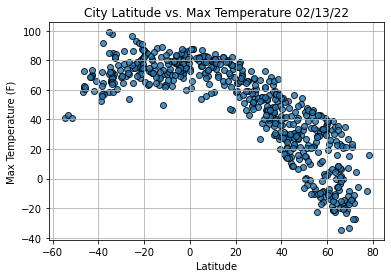

In [21]:
# Code for graphing
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

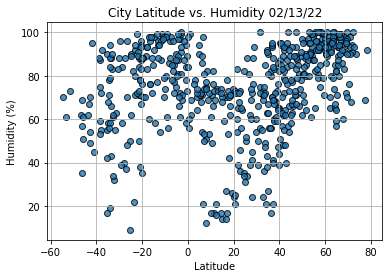

In [22]:
# 6.3.2 Plotting graphs

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

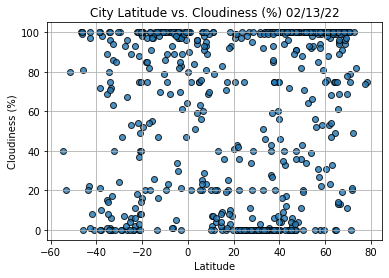

In [23]:
# 6.3.3 Plotting grahps
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

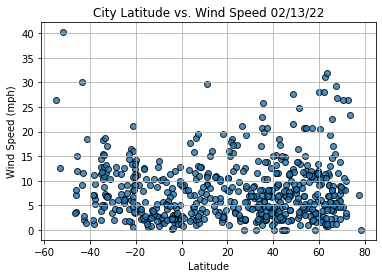

In [24]:
# 6.3.4 Plotting graphs
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()